This program calculates scatter properties using (1) micro-faceted approach, (2) assumes a guassian distribution.  

In [1]:
from IPython.display import display, Image, HTML
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm

Establish Incident Light - Input Incident Angle

In [2]:
i_y = np.arange(0,10)
i_x = np.array([0.0]*len(i_y))
i_angle = -float(raw_input('Input Incident Angle: '))

i_x_1 = i_x_1 = i_x*math.cos(math.radians(i_angle)) + i_y*math.sin(math.radians(i_angle))
i_y_1 = i_y*math.cos(math.radians(i_angle))

Input Incident Angle: 20


Establish Micro-Faceted Slopes - Input Roughness Parameter

In [3]:
scatter_angle = np.arange(-90, 91, 1)

n_data = len(scatter_angle)
n_rnd = 1000

scale = float(raw_input('Input roughness factor (1-30): '))

m = np.random.normal(loc=0, scale=scale, size=n_rnd) 
y = np.zeros((n_data, n_rnd))  

for light_reflected in xrange(n_rnd):
    y[:,light_reflected] = m[light_reflected] * scatter_angle

kde = gaussian_kde(m)
yd = kde(scatter_angle)/np.amax(kde(scatter_angle))

Input roughness factor (1-30): 30


Establish scatter light visualization data

In [4]:
scatter_angle = [math.radians(x) for x in scatter_angle]
Isy = [x*math.cos(y) for x, y in zip(yd, scatter_angle)]
Isx = [x*math.sin(y) for x, y in zip(yd, scatter_angle)]

zero_x =[0]*len(scatter_angle)
zero_y =[0]*len(scatter_angle)

ref_y = [0, 1.5]
ref_x = [0]*len(ref_y)

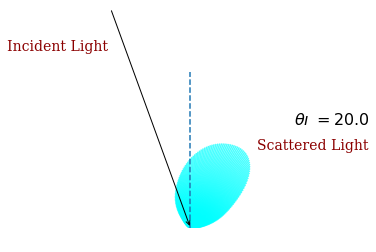

In [5]:
# rotation matrix; x' = xcos(i_angle) + ysin(i_angle); y' = ycos(90-i_angle) - xsin(90-i_angle) for x, y 
Isx = [x*math.cos(math.radians(-i_angle)) + y*math.sin(math.radians(-i_angle)) for x, y in zip(Isx, Isy)]
Isy = [y*math.cos(math.radians(-i_angle)) - x*math.sin(math.radians(-i_angle)) for x, y in zip(Isx, Isy)]

for i in range(len(scatter_angle)):
    plt.plot([zero_x[i], Isx[i]], [zero_y[i], Isy[i]], 'cyan', alpha = 0.7) 
plt.xlim(-1,1)
plt.axis()
plt.gca().set_aspect('equal', adjustable='box')
plt.annotate('', (0, 0), xycoords=('data'), xytext=(i_x_1[-1]*.25, i_y_1[-1]*.25), arrowprops=dict(arrowstyle='->'))
plt.text(1, 1, r'$\theta\i\ =$' +str(i_angle*(-1)), fontsize=16)
font = {'family':'serif', 'color':'darkred', 'size': 14}
plt.text((i_x_1[-1]*.25)-1, (i_y_1[-1]*.25)-0.4,'Incident Light', fontdict = font)
plt.text(Isx[100]+.15, Isy[100],'Scattered Light', fontdict = font)
plt.ylim(0,2.1)
plt.axis('off')
plt.plot(ref_x, ref_y, '--')
plt.show()